In [10]:
import os
import pandas as pd
import requests
from sklearn.preprocessing import MinMaxScaler
import json
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import FigureCanvasPdf, PdfPages
from matplotlib.figure import Figure
import numpy as np
import chart_studio.plotly as py
%matplotlib inline
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

In [11]:
print(__version__) # requires version >= 1.9.0

4.9.0


In [12]:
# For Notebooks
init_notebook_mode(connected=True)

In [13]:
# For offline use
cf.go_offline()

In [14]:
#os.listdir()

In [15]:
#os.chdir("drive/My Drive/Studio-Lab-Healthcare-Ellinger/kmeans")

In [16]:
r = requests.get("https://github.com/AhmadzadehSanaz/Studio-Lab-Healthcare-Ellinger/raw/main/Data%20Pipeline/hexagon_collection_master.geojson")

In [17]:
data = r.json()

In [18]:
# with open("datafilename.geojson") as jsonFile:
# data = json.loads(jsonFile.read()

In [19]:
features = [f["properties"] for f in data["features"]]

In [20]:
df = pd.DataFrame.from_records(features)

In [21]:
df.head()

fid    id           top         right        bottom  adult_obesity  \
0    1  6274  1.913898e+06  1.162049e+06  1.911258e+06  140500.000000   
1    2  6275  1.911258e+06  1.162049e+06  1.908618e+06  133000.000000   
2    3  6272  1.919178e+06  1.162049e+06  1.916538e+06  159750.000000   
3    4  6273  1.916538e+06  1.162049e+06  1.913898e+06  148000.000000   
4    5  6278  1.903338e+06  1.162049e+06  1.900698e+06  110333.333333   

   total_population  hispanic_or_latino_population_number_mean  \
0      79532.000000                               28172.500000   
1      84458.000000                               22477.000000   
2      53749.750000                               16572.250000   
3      74606.000000                               33868.000000   
4      55750.666667                                9764.666667   

   non_hispanic_african_american_or_black_population_number_mean  \
0                                        5053.500000               
1                                        6551.000000               
2                                        2050.750000               
3                                        3556.000000               
4                                       14421.666667               

   non_hispanic_asian_or_pacific_islander_population_number_mean  ...  \
0                                             2817.0              ...   
1                                             3373.0              ...   
2                                             2369.0              ...   
3                                             2261.0              ...   
4                                             4577.0              ...   

    nearest_bus_station_name  nearest_bus_station_distance  \
0  Milwaukee & Oakley/Moffat                      0.054090   
1         Western & Le Moyne                      0.067718   
2         Western & Schubert                      0.112082   
3           Western & Belden                      0.097150   
4           Western & Fulton                      0.028106   

      nearest_bike_station_name  nearest_bike_station_distance  \
0   Western Ave & Winnebago Ave                       0.072335   
1     Claremont Ave & Hirsch St                       0.054763   
2       Logan Blvd & Elston Ave                       0.091337   
3  Campbell Ave & Fullerton Ave                       0.219662   
4     Artesian Ave & Hubbard St                       0.216887   

   bike_station_count  predominant_race_by_population_per_cell  \
0                 2.0                       Non-Hispanic White   
1                 3.0                       Non-Hispanic White   
2                 1.0                       Non-Hispanic White   
3                 1.0                       Hispanic or Latino   
4                 1.0                       Non-Hispanic White   

   hispanic_or_latino_cell  non_hispanic_african_american_or_black_cell  \
0                        0                                            0   
1                        0                                            0   
2                        0                                            0   
3                        1                                            0   
4                        0                                            0   

   non_hispanic_asian_or_pacific_islander_cell  non_hispanic_white_cell  
0                                            0                        1  
1                                            0                        1  
2                                            0                        1  
3                                            0                        0  
4                                            0                        1  

[5 rows x 38 columns]

In [22]:
df.columns

Index(['fid', 'id', 'top', 'right', 'bottom', 'adult_obesity',
       'total_population', 'hispanic_or_latino_population_number_mean',
       'non_hispanic_african_american_or_black_population_number_mean',
       'non_hispanic_asian_or_pacific_islander_population_number_mean',
       'non_hispanic_white_population_number_mean', 'park_count',
       'population_no_health_insurance', 'median_household_income',
       'hospital_count', 'cta_rail_station_count', 'cta_bus_station_count',
       'asthma_population_number', 'diabetes_population_number',
       'air_quality_index_number', 'air_quality_PM10_number\t',
       'air_quality_PM25_number', 'nearest_park_name', 'nearest_park_distance',
       'nearest_hospital_name', 'nearest_hospital_distance',
       'nearest_cta_rail_station_name', 'nearest_cta_rail_station_distance',
       'nearest_bus_station_name', 'nearest_bus_station_distance',
       'nearest_bike_station_name', 'nearest_bike_station_distance',
       'bike_station_count',

In [23]:
exclude = ['fid', 'id', 'top', 'right', 'bottom',"predominant_race_by_population_per_cell"]

In [24]:
withName = [i for i in df.columns if "name" in i]

In [25]:
exclude = exclude + withName

In [26]:
exclude

['fid',
 'id',
 'top',
 'right',
 'bottom',
 'predominant_race_by_population_per_cell',
 'nearest_park_name',
 'nearest_hospital_name',
 'nearest_cta_rail_station_name',
 'nearest_bus_station_name',
 'nearest_bike_station_name']

In [27]:
race = pd.get_dummies(df["predominant_race_by_population_per_cell"])

In [28]:
race

Hispanic or Latino  Non-Hispanic African American or Black  \
0                      0                                       0   
1                      0                                       0   
2                      0                                       0   
3                      1                                       0   
4                      0                                       0   
...                  ...                                     ...   
1233                   0                                       1   
1234                   0                                       1   
1235                   0                                       1   
1236                   0                                       1   
1237                   0                                       1   

      Non-Hispanic Asian or Pacific Islander  Non-Hispanic White  
0                                          0                   1  
1                                          0                   1  
2                                          0                   1  
3                                          0                   0  
4                                          0                   1  
...                                      ...                 ...  
1233                                       0                   0  
1234                                       0                   0  
1235                                       0                   0  
1236                                       0                   0  
1237                                       0                   0  

[1238 rows x 4 columns]

In [29]:
df["predominant_race_by_population_per_cell"].unique()

array(['Non-Hispanic White', 'Hispanic or Latino',
       'Non-Hispanic African American or Black',
       'Non-Hispanic Asian or Pacific Islander'], dtype=object)

In [30]:
X = df.drop(exclude,axis=1)

In [31]:
X.head()

adult_obesity  total_population  hispanic_or_latino_population_number_mean  \
0  140500.000000      79532.000000                               28172.500000   
1  133000.000000      84458.000000                               22477.000000   
2  159750.000000      53749.750000                               16572.250000   
3  148000.000000      74606.000000                               33868.000000   
4  110333.333333      55750.666667                                9764.666667   

   non_hispanic_african_american_or_black_population_number_mean  \
0                                        5053.500000               
1                                        6551.000000               
2                                        2050.750000               
3                                        3556.000000               
4                                       14421.666667               

   non_hispanic_asian_or_pacific_islander_population_number_mean  \
0                                             2817.0               
1                                             3373.0               
2                                             2369.0               
3                                             2261.0               
4                                             4577.0               

   non_hispanic_white_population_number_mean  park_count  \
0                               41541.500000           2   
1                               49729.000000           2   
2                               31349.750000           1   
3                               33354.000000           2   
4                               25626.333333           2   

   population_no_health_insurance  median_household_income  hospital_count  \
0                    10409.000000             73183.000000               0   
1                     9424.000000             79013.000000               1   
2                     6492.250000             80099.250000               0   
3                    11394.000000             67353.000000               0   
4                     5573.666667             54067.333333               0   

   ...  nearest_park_distance  nearest_hospital_distance  \
0  ...               0.107567                   0.569742   
1  ...               0.175790                   0.071033   
2  ...               0.223092                   1.569618   
3  ...               0.002885                   1.069653   
4  ...               0.233405                   1.092766   

   nearest_cta_rail_station_distance  nearest_bus_station_distance  \
0                           0.090404                      0.054090   
1                           0.435950                      0.067718   
2                           0.822329                      0.112082   
3                           0.484871                      0.097150   
4                           0.559566                      0.028106   

   nearest_bike_station_distance  bike_station_count  hispanic_or_latino_cell  \
0                       0.072335                 2.0                        0   
1                       0.054763                 3.0                        0   
2                       0.091337                 1.0                        0   
3                       0.219662                 1.0                        1   
4                       0.216887                 1.0                        0   

   non_hispanic_african_american_or_black_cell  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   non_hispanic_asian_or_pacific_islander_cell  non_hispanic_white_cell  
0                                            0                        1  
1                                            0                        1  
2                                            0                        1  
3 

In [32]:
min_max_scaler = MinMaxScaler()

In [33]:
X[X.columns] = min_max_scaler.fit_transform(X)

In [34]:
X

adult_obesity  total_population  \
0          0.308791          0.786628   
1          0.292308          0.838293   
2          0.351099          0.516217   
3          0.325275          0.734963   
4          0.242491          0.537203   
...             ...               ...   
1233       0.278022          0.077214   
1234       0.147253          0.255787   
1235       0.147253          0.255787   
1236       0.139560          0.213399   
1237       0.147253          0.255787   

      hispanic_or_latino_population_number_mean  \
0                                      0.446812   
1                                      0.356264   
2                                      0.262389   
3                                      0.537361   
4                                      0.154160   
...                                         ...   
1233                                   0.068243   
1234                                   0.037297   
1235                                   0.037297   
1236                                   0.027647   
1237                                   0.037297   

      non_hispanic_african_american_or_black_population_number_mean  \
0                                              0.062502               
1                                              0.081318               
2                                              0.024774               
3                                              0.043687               
4                                              0.180209               
...                                                 ...               
1233                                           0.061968               
1234                                           0.201083               
1235                                           0.201083               
1236                                           0.144316               
1237                                           0.201083               

      non_hispanic_asian_or_pacific_islander_population_number_mean  \
0                                              0.169281               
1                                              0.202692               
2                                              0.142359               
3                                              0.135869               
4                                              0.275044               
...                                                 ...               
1233                                           0.000030               
1234                                           0.006610               
1235                                           0.006610               
1236                                           0.005979               
1237                                           0.006610               

      non_hispanic_white_population_number_mean  park_count  \
0                                      0.526560         0.4   
1                                      0.630433         0.4   
2                                      0.397259         0.2   
3                                      0.422687         0.4   
4                                      0.324647         0.4   
...                                         ...         ...   
1233                                   0.030524         0.0   
1234                                   0.122453         0.0   
1235                                   0.122453         0.0   
1236                                   0.137386         0.0   
1237                                   0.122453         0.2   

      population_no_health_insurance  median_household_income  hospital_count  \
0                           0.532468                 0.624494        0.000000   
1                           0.479607                 0.686446        0.333333   
2                           0.322274                 0.697989        0.000000   
3                           0.585328                 0.562542        0.000000   
4                           0.27

In [35]:
X[race.columns] = race

In [36]:
X.describe()

adult_obesity  total_population  \
count    1238.000000       1238.000000   
mean        0.339674          0.360842   
std         0.198895          0.233087   
min         0.000000          0.000000   
25%         0.200000          0.180660   
50%         0.318681          0.309424   
75%         0.457143          0.494926   
max         1.000000          1.000000   

       hispanic_or_latino_population_number_mean  \
count                                1238.000000   
mean                                    0.171063   
std                                     0.194681   
min                                     0.000000   
25%                                     0.032544   
50%                                     0.073482   
75%                                     0.259237   
max                                     1.000000   

       non_hispanic_african_american_or_black_population_number_mean  \
count                                        1238.000000               
mean                                            0.156092               
std                                             0.204044               
min                                             0.000000               
25%                                             0.010133               
50%                                             0.086501               
75%                                             0.232193               
max                                             1.000000               

       non_hispanic_asian_or_pacific_islander_population_number_mean  \
count                                        1238.000000               
mean                                            0.121419               
std                                             0.179043               
min                                             0.000000               
25%                                             0.006550               
50%                                             0.030527               
75%                                             0.140887               
max                                             1.000000               

       non_hispanic_white_population_number_mean   park_count  \
count                                1238.000000  1238.000000   
mean                                    0.162810     0.099515   
std                                     0.190317     0.149534   
min                                     0.000000     0.000000   
25%                                     0.022635     0.000000   
50%                                     0.079984     0.000000   
75%                                     0.215748     0.200000   
max                                     1.000000     1.000000   

       population_no_health_insurance  median_household_income  \
count                     1238.000000              1238.000000   
mean                         0.275763                 0.381031   
std                          0.226502                 0.220393   
min                          0.000000                 0.000000   
25%                          0.111678                 0.201373   
50%                          0.200789                 0.315222   
75%                          0.383815                 0.491068   
max                          1.000000                 1.000000   

       hospital_count  ...  nearest_bike_station_distance  bike_station_count  \
count     1238.000000  ...                    1238.000000         1238.000000   
mean         0.011847  ...                       0.140076            0.052181   
std          0.068629  ...                       0.204069            0.101759   
min          0.000000  ...                       0.000000            0.000000   
25%          0.000000  ...                       0.019552            0.000000   
50%          0.000000  ...                       0.044902            0.000000   
75%          0.000000  ...                       0.168677            0.100000   
max          1.000000  ...      

In [37]:
from sklearn.cluster import KMeans

In [38]:
kmeans = KMeans(n_clusters=5)

In [39]:
kmeans = kmeans.fit(X)

In [40]:
kmeans.labels_

array([1, 1, 1, ..., 4, 4, 4])

In [41]:
X["cluster"] = kmeans.labels_

In [42]:
df["cluster"] = kmeans.labels_

In [43]:
df.head()

fid    id           top         right        bottom  adult_obesity  \
0    1  6274  1.913898e+06  1.162049e+06  1.911258e+06  140500.000000   
1    2  6275  1.911258e+06  1.162049e+06  1.908618e+06  133000.000000   
2    3  6272  1.919178e+06  1.162049e+06  1.916538e+06  159750.000000   
3    4  6273  1.916538e+06  1.162049e+06  1.913898e+06  148000.000000   
4    5  6278  1.903338e+06  1.162049e+06  1.900698e+06  110333.333333   

   total_population  hispanic_or_latino_population_number_mean  \
0      79532.000000                               28172.500000   
1      84458.000000                               22477.000000   
2      53749.750000                               16572.250000   
3      74606.000000                               33868.000000   
4      55750.666667                                9764.666667   

   non_hispanic_african_american_or_black_population_number_mean  \
0                                        5053.500000               
1                                        6551.000000               
2                                        2050.750000               
3                                        3556.000000               
4                                       14421.666667               

   non_hispanic_asian_or_pacific_islander_population_number_mean  ...  \
0                                             2817.0              ...   
1                                             3373.0              ...   
2                                             2369.0              ...   
3                                             2261.0              ...   
4                                             4577.0              ...   

   nearest_bus_station_distance     nearest_bike_station_name  \
0                      0.054090   Western Ave & Winnebago Ave   
1                      0.067718     Claremont Ave & Hirsch St   
2                      0.112082       Logan Blvd & Elston Ave   
3                      0.097150  Campbell Ave & Fullerton Ave   
4                      0.028106     Artesian Ave & Hubbard St   

   nearest_bike_station_distance  bike_station_count  \
0                       0.072335                 2.0   
1                       0.054763                 3.0   
2                       0.091337                 1.0   
3                       0.219662                 1.0   
4                       0.216887                 1.0   

   predominant_race_by_population_per_cell  hispanic_or_latino_cell  \
0                       Non-Hispanic White                        0   
1                       Non-Hispanic White                        0   
2                       Non-Hispanic White                        0   
3                       Hispanic or Latino                        1   
4                       Non-Hispanic White                        0   

   non_hispanic_african_american_or_black_cell  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   non_hispanic_asian_or_pacific_islander_cell  non_hispanic_white_cell  \
0                                            0                        1   
1                                            0                        1   
2                                            0                        1   
3                                            0                        0   
4                                            0                        1   

   cluster  
0        1  
1        1  
2        1  
3        2  
4        1  

[5 rows x 39 columns]

In [44]:
def clusterCity(X,features=None,n_clusters=5):
  min_max_scaler = MinMaxScaler()
  X[X.columns] = min_max_scaler.fit_transform(X)
  if features:
    X = X[features]
  kmeans = KMeans(n_clusters=n_clusters,random_state=23)
  kmeans = kmeans.fit(X)
  return kmeans.labels_

In [45]:
X.columns

Index(['adult_obesity', 'total_population',
       'hispanic_or_latino_population_number_mean',
       'non_hispanic_african_american_or_black_population_number_mean',
       'non_hispanic_asian_or_pacific_islander_population_number_mean',
       'non_hispanic_white_population_number_mean', 'park_count',
       'population_no_health_insurance', 'median_household_income',
       'hospital_count', 'cta_rail_station_count', 'cta_bus_station_count',
       'asthma_population_number', 'diabetes_population_number',
       'air_quality_index_number', 'air_quality_PM10_number\t',
       'air_quality_PM25_number', 'nearest_park_distance',
       'nearest_hospital_distance', 'nearest_cta_rail_station_distance',
       'nearest_bus_station_distance', 'nearest_bike_station_distance',
       'bike_station_count', 'hispanic_or_latino_cell',
       'non_hispanic_african_american_or_black_cell',
       'non_hispanic_asian_or_pacific_islander_cell',
       'non_hispanic_white_cell', 'Hispanic or Latino

adult_obesity


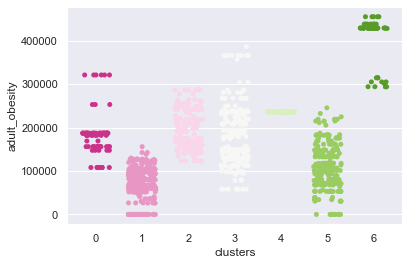

population_no_health_insurance


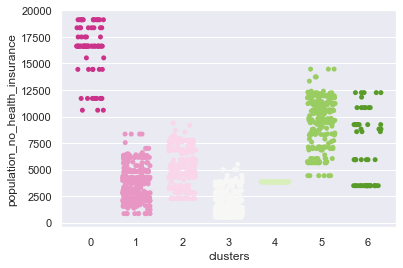

diabetes_population_number


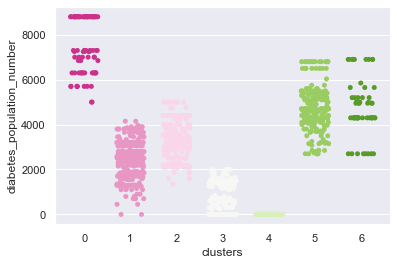

nearest_park_distance


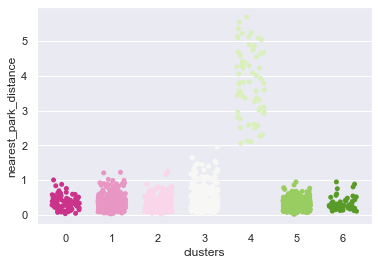

hospital_count


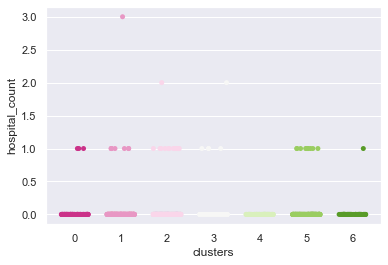

In [57]:
#https://www.geeksforgeeks.org/seaborn-categorical-plots/
cluster_features = ["adult_obesity", "population_no_health_insurance", "diabetes_population_number", "nearest_park_distance", "hospital_count"]
n_clusters = 7
clusters = clusterCity(X,cluster_features,n_clusters)
df["clusters"] = clusters

for i,f in enumerate(data["features"]):
  f["properties"]["cluster"] = int(clusters[i])

with open("geojsonWCluster1.geojson","w") as jsonFile:
  jsonFile.write(json.dumps(data))

df_features_clusters = df[cluster_features+["clusters"]]

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

for f in cluster_features: 
  print(f)
  sns.stripplot(x="clusters", y=f, data=df_features_clusters, palette="PiYG", jitter=0.3)
  
 # https://problemsolvingwithpython.com/06-Plotting-with-Matplotlib/06.04-Saving-Plots/
 # https://futurestud.io/tutorials/matplotlib-save-plots-as-file
 # plt.xlabel('x values')
 # plt.ylabel('y values')
 # plt.title('plotted x and y values')
 # plt.legend(['line 1'])

  df.iplot(kind='box')
  df["clusters"].iplot(kind='box')
  plt.plot()
  #plt.savefig('fig.pdf')               
  plt.show()      

total_population


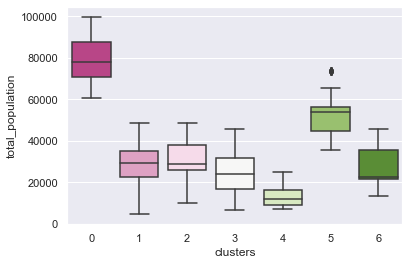

air_quality_index_number


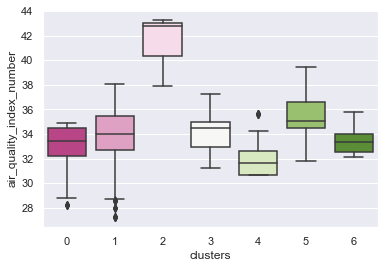

nearest_hospital_distance


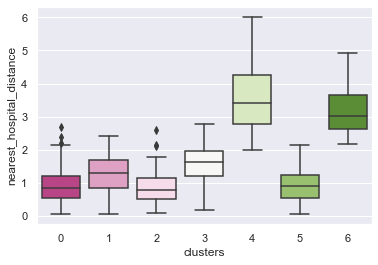

nearest_cta_rail_station_distance


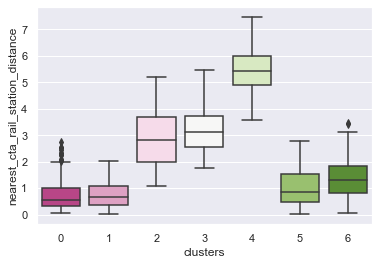

In [47]:
cluster_features = ["total_population","air_quality_index_number","nearest_hospital_distance","nearest_cta_rail_station_distance"]
n_clusters = 7
clusters = clusterCity(X,cluster_features,n_clusters)
df["clusters"] = clusters

for i,f in enumerate(data["features"]):
  f["properties"]["cluster"] = int(clusters[i])

with open("geojsonWCluster2.geojson","w") as jsonFile:
  jsonFile.write(json.dumps(data))

df_features_clusters = df[cluster_features+["clusters"]]

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

for f in cluster_features: 
  print(f)
  sns.boxplot(x="clusters", y=f, data=df_features_clusters, palette="PiYG")
  plt.show()

total_population


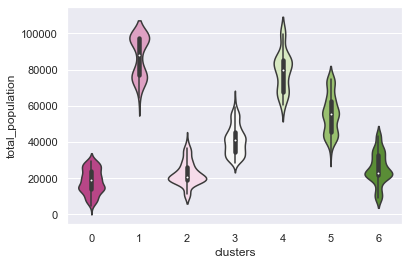

median_household_income


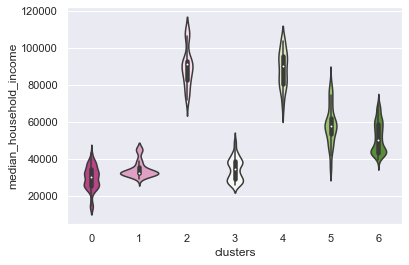

non_hispanic_white_population_number_mean


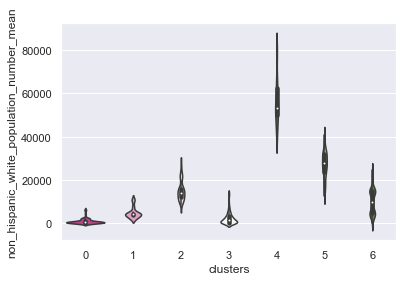

In [48]:
cluster_features = ["total_population","median_household_income", "non_hispanic_white_population_number_mean"] 
clusters = clusterCity(X,cluster_features,n_clusters)
df["clusters"] = clusters

for i,f in enumerate(data["features"]):
  f["properties"]["cluster"] = int(clusters[i])

with open("geojsonWCluster3.geojson","w") as jsonFile:
  jsonFile.write(json.dumps(data))

df_features_clusters = df[cluster_features+["clusters"]]

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

for f in cluster_features: 
  print(f)
  sns.violinplot(x="clusters", y=f, data=df_features_clusters, palette="PiYG")
    
  plt.show()

total_population


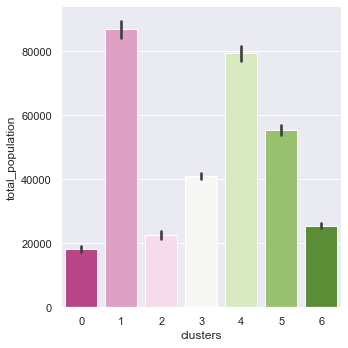

median_household_income


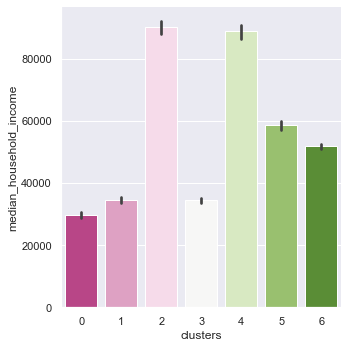

non_hispanic_white_population_number_mean


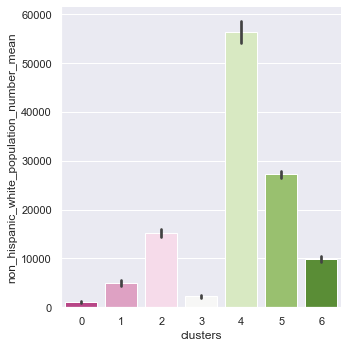

In [38]:
cluster_features = ["total_population","median_household_income", "non_hispanic_white_population_number_mean"] 
n_clusters = 7
clusters = clusterCity(X,cluster_features,n_clusters)
df["clusters"] = clusters

for i,f in enumerate(data["features"]):
  f["properties"]["cluster"] = int(clusters[i])

with open("geojsonWCluster4.geojson","w") as jsonFile:
  jsonFile.write(json.dumps(data))

df_features_clusters = df[cluster_features+["clusters"]]

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

for f in cluster_features: 
  print(f)
  sns.catplot(x="clusters", y=f, data=df_features_clusters, palette="PiYG", kind ='bar')
    
  plt.show()